**Install MiniSom Package**

In [ ]:
!pip install MiniSom

**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'12J0GGTr_jnvYsnGisNwoNAaG2QFGXyhn'}) 
downloaded.GetContentFile('Dataset for FODS Assignment.csv')

In [ ]:
dataset = pd.read_csv('Dataset for FODS Assignment.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values


**Feature Scaling** 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

**Training the SOM**

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

**Visualizing the results**

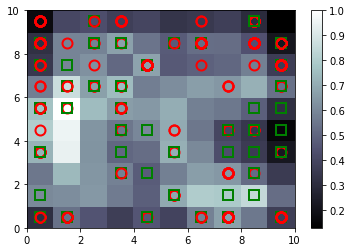

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

**Finding the frauds**

In [ ]:
mappings = som.win_map(X)
frauds = mappings[(2,6)]
frauds = sc.inverse_transform(frauds)


**Printing the fraud clients**

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15684722
15567839
15646082
15604536
15635598
15623369
15650591
15633608
15675450
